In [1]:
import matplotlib.pyplot as plt
from wavebench.plot_utils import remove_frame

## Helmholtz dataset

In [2]:
# import torch
# from torch import default_generator, randperm
# generator = torch.Generator().manual_seed(42)

# indices = randperm(50000, generator=generator).tolist()
# len(indices[49000:49000+500])

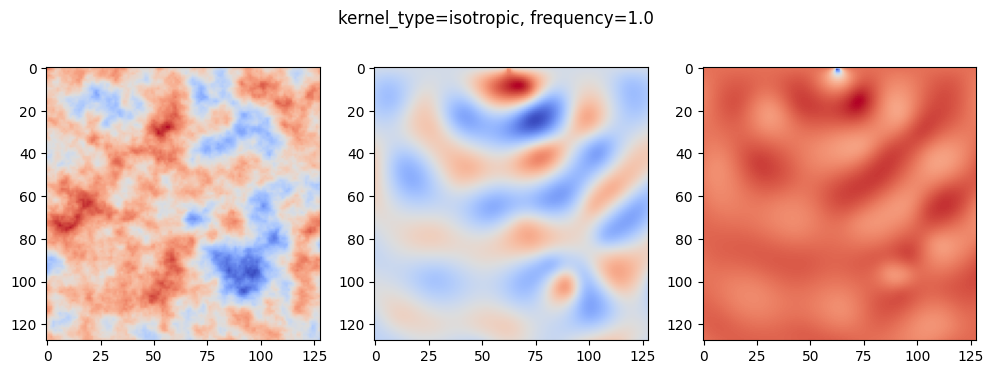

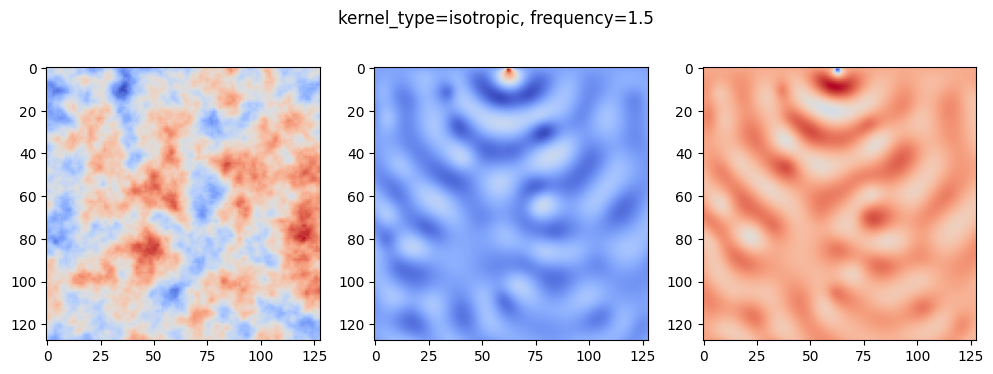

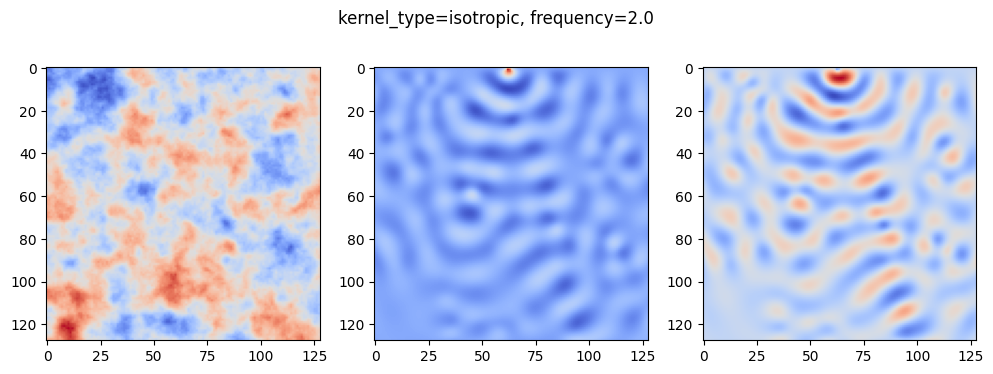

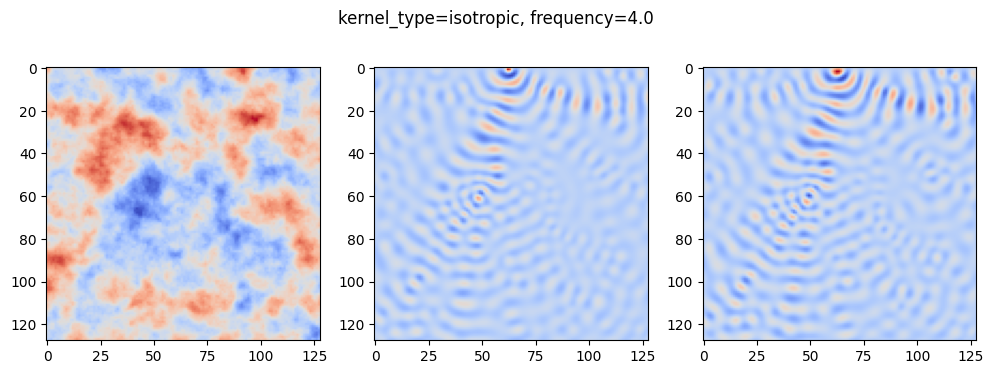

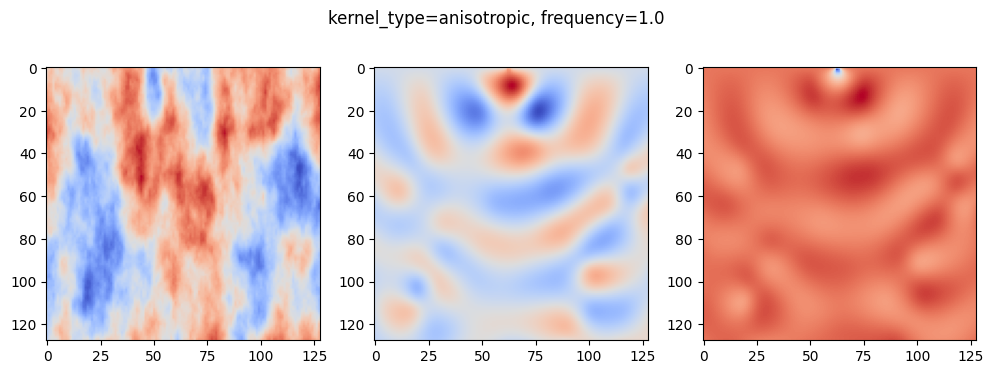

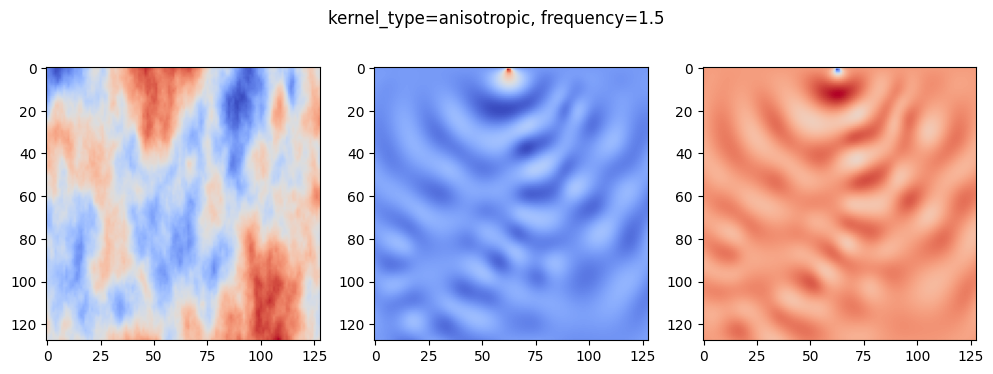

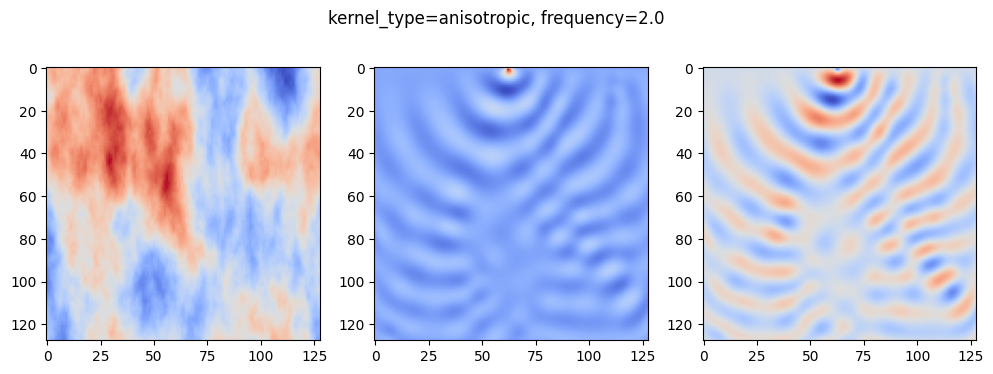

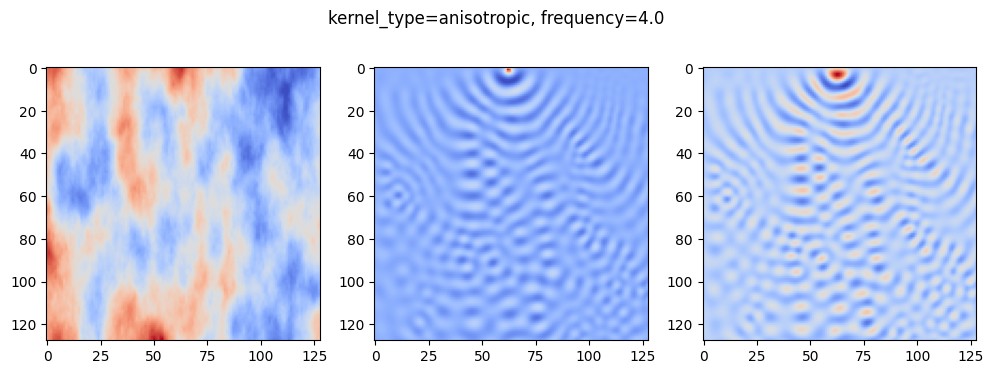

In [3]:
from wavebench.dataloaders.helmholtz_loader import get_dataloaders_helmholtz

for kernel_type in ['isotropic', 'anisotropic']:
  for frequency in [1.0, 1.5, 2.0, 4.0]:
    loaders = get_dataloaders_helmholtz(kernel_type, frequency, use_ffcv=True)
    a, b = next(iter(loaders['train']))


    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(a.squeeze().numpy(), cmap='coolwarm')
    axes[1].imshow(b.squeeze()[0].numpy(), cmap='coolwarm')
    axes[2].imshow(b.squeeze()[1].numpy(), cmap='coolwarm')

    plt.suptitle(f'kernel_type={kernel_type}, frequency={frequency}')
